In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True

In [2]:
# Importazione dei file usati per i grafici
sprRes = pd.read_csv('../dataSets/sprint_results.csv')
sprGr = pd.read_csv('../dataSets/sprint_grid.csv')

#palette dei colori
palette = ['#6dd3ce', '#b24c63', '#46b6f1', '#c8e9a0']

Percentuale di vittorie nelle sprint di ogni vincitore

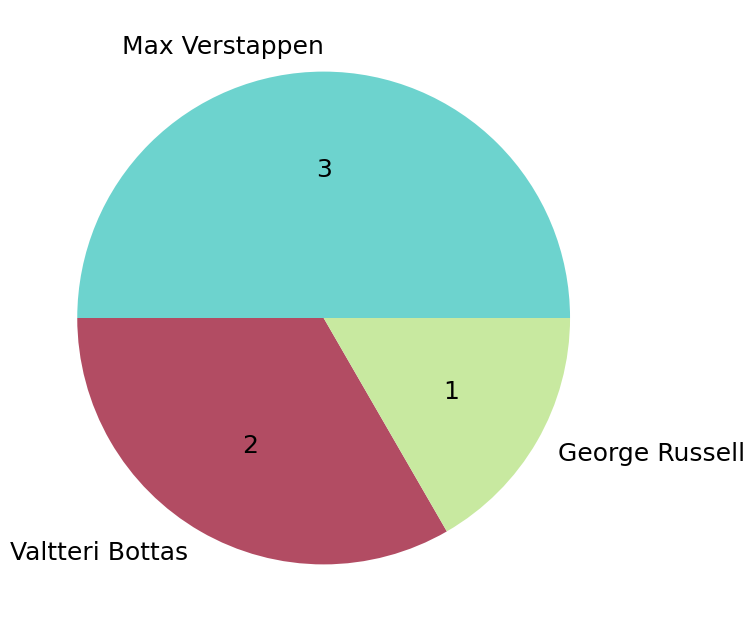

In [6]:
# Conversione di tutti i valori non numerici in 100
sprRes['Pos'] = pd.to_numeric(sprRes['Pos'], errors='coerce').fillna(100).astype(int)

# Filtraggio per piloti che hanno vinto almeno una sprint
vincitori_sprint = sprRes[sprRes['Pos'] == 1]

# Creazione di una colonna che identifica ogni sprint in modo univoco
vincitori_sprint['Sprint'] = vincitori_sprint['Year'].astype(str) + " - " + vincitori_sprint['Grand Prix']

# Conteggio del numero totale di gare sprint disputate
totale_sprint = vincitori_sprint['Sprint'].nunique()

# Conteggio del numero di vittorie per ciascun pilota
conteggio_vittorie = vincitori_sprint['Driver'].value_counts()

# Calcola le percentuali di vittorie
percentuali_vittorie = (conteggio_vittorie / totale_sprint) * 100

# Creazione del grafico a torta
plt.figure(figsize=(10, 8))
plt.pie(conteggio_vittorie, labels=[f'{driver}' for driver, conteggio in zip(conteggio_vittorie.index, conteggio_vittorie)], 
        autopct=lambda p: f'{int(round(p * totale_sprint / 100))}',
        colors=[palette[0], palette[1], palette[3]],textprops={'fontsize': 18})

plt.savefig('../img/sprintVinte.png',format='png')

plt.show()

Numero sprint disputate per ogni stato ospitante

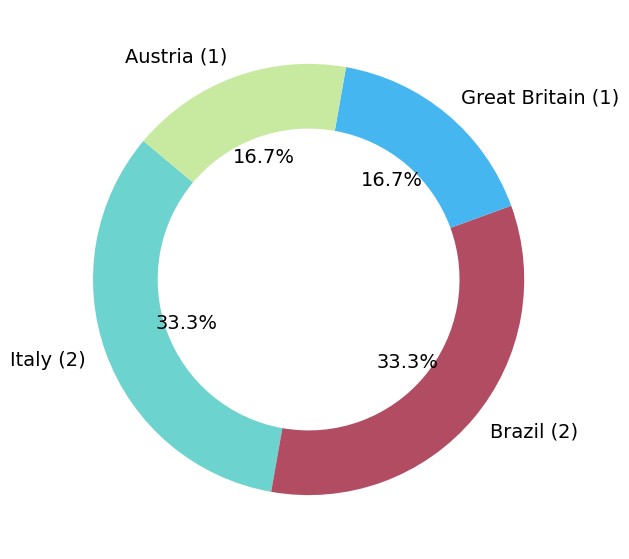

In [4]:
# Creazione una colonna 'GP_Year' che combina 'Grand Prix' e 'Year' per identificare le gare univocamente
sprRes['GP_Year'] = sprRes['Grand Prix'] + ' ' + sprRes['Year'].astype(str)

# Rimozione dei duplicati per ottenere le singole gare sprint
gare_sprint = sprRes.drop_duplicates(subset='GP_Year')

# Conteggio delle gare sprint per stato
sprints_per_circuit = gare_sprint['Grand Prix'].value_counts()

# Creazione del grafico ad anello
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(sprints_per_circuit, labels=sprints_per_circuit.index, autopct='%1.1f%%', startangle=140, 
                                   colors=palette, wedgeprops=dict(width=0.3), textprops={'fontsize': 14})

# Aggiungiunta dei valori esatti a fianco dei nomi degli stati
for i, text in enumerate(texts):
    text.set_text(f'{text.get_text()} ({sprints_per_circuit.values[i]})')

plt.savefig('../img/sprintStati.png',format='png')

plt.show()

Numero di pole fatte nelle sprint

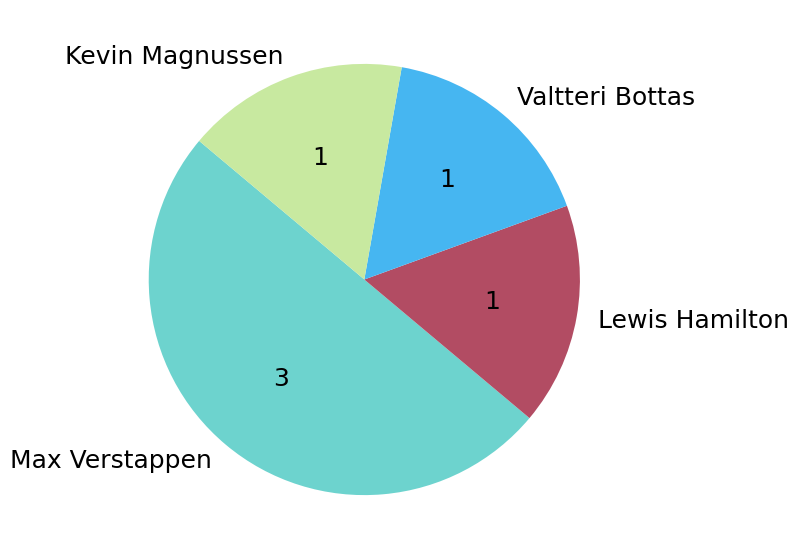

In [5]:
# Conversione della colonna 'Pos' in numerico per raceDet, sostituendo le stringhe con 100
sprGr['Pos'] = pd.to_numeric(sprGr['Pos'], errors='coerce').fillna(100).astype(int)

# Consideriamo solo le righe in cui il pilota ha ottenuto la pole position
pole_position = sprGr[sprGr['Pos'] == 1]

# Creazione di una colonna 'GP_Year' che combina 'Grand Prix' e 'Year' per identificare le gare univocamente
pole_position['GP_Year'] = pole_position['Grand Prix'] + ' ' + pole_position['Year'].astype(str)

# Conteggio di quante gare sprint sono state disputate
total_sprint = pole_position['GP_Year'].nunique()

# Conteggio del numero di pole position per ogni pilota
numero_pole = pole_position['Driver'].value_counts()

# Creazione del grafico a torta
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(numero_pole, labels=numero_pole.index, 
                                   autopct=lambda p: f'{int(round(p*total_sprint/100))} ({p:.1f}%)', startangle=140, 
                                   colors=palette, textprops={'fontsize': 18})

# Personalizzazione dell'autotext per visualizzare il numero assoluto delle pole
for i, text in enumerate(autotexts):
    text.set_text(f'{int(round(numero_pole.values[i]))}')

plt.savefig('../img/sprintPole.png',format='png')

plt.show()